Step 1: Importing required libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


pandas, numpy → data handling

matplotlib, seaborn → visualization

Step 2: Loading the dataset

In [7]:
df = pd.read_csv('train.csv')
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


This file contains historical weekly sales data for Walmart stores and departments.
Each row represents weekly sales for one department in one store.

Step 3: Data inspection

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


This helps us understand:

column names

data types

missing values

Important columns:

Date → time information

Weekly_Sales → value we want to forecast

Step 4: Converting Date column to datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Time-series analysis requires the date column to be in datetime format, not text.

Step 5: Checking missing values


In [11]:
df.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Forecasting models cannot work properly with missing values.
This step ensures data quality.

Step 6: Aggregating sales by Date

We forecast total Walmart sales over time, not store-wise or dept-wise (keep it simple and strong).

In [12]:
daily_sales = (
    df.groupby('Date', as_index=False)['Weekly_Sales']
      .sum()
)

daily_sales.head()


,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


Combines all stores and departments

Gives total sales per date

This becomes a clean time series

Step 7: Sorting data by Date

In [13]:
daily_sales = daily_sales.sort_values('Date')


Time series data must always be in chronological order.

Step 8: Visualizing sales trend

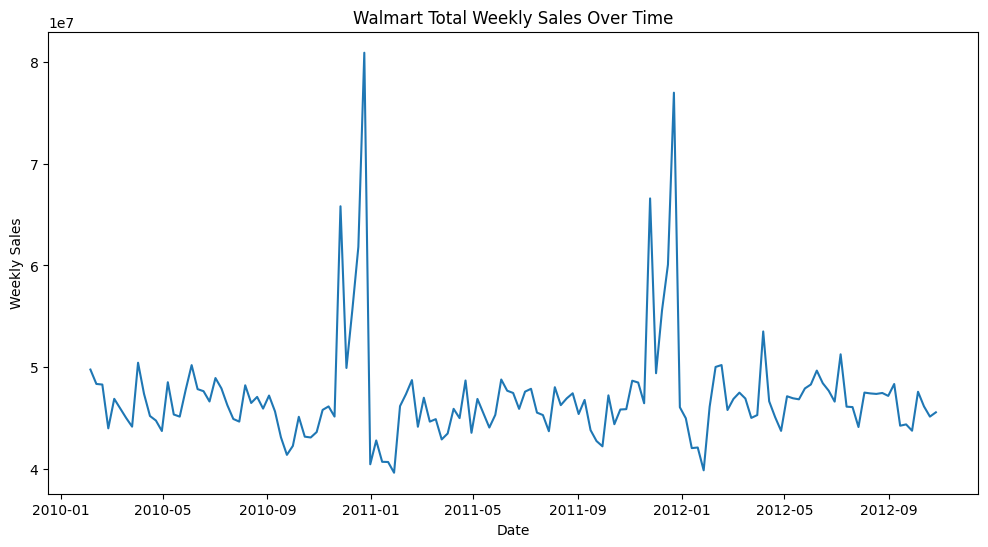

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Weekly_Sales'])
plt.title('Walmart Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


This plot helps me visually understand:
overall trend
fluctuations
possible seasonality

Step 9: Checking moving average (trend smoothing)

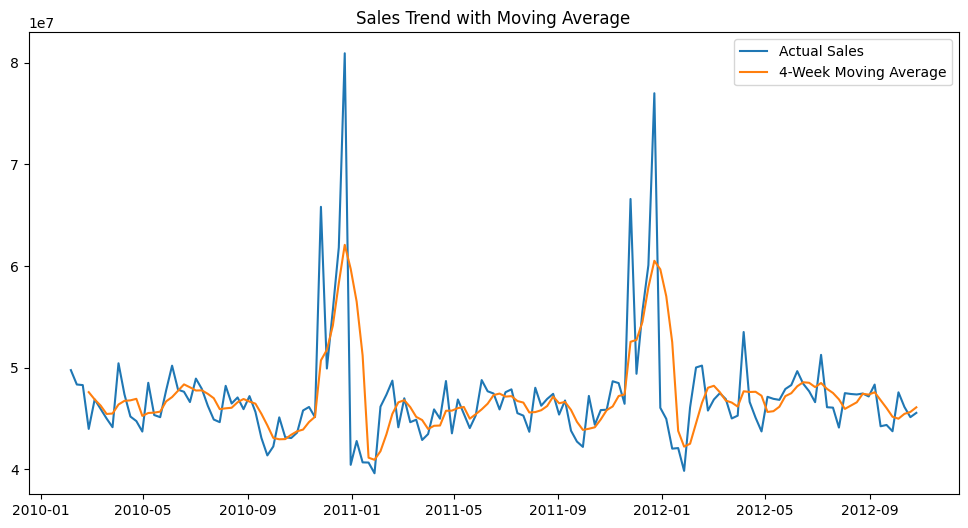

In [15]:
daily_sales['Moving_Avg_4'] = (
    daily_sales['Weekly_Sales']
    .rolling(window=4)
    .mean()
)

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(daily_sales['Date'], daily_sales['Moving_Avg_4'], label='4-Week Moving Average')
plt.legend()
plt.title('Sales Trend with Moving Average')
plt.show()


Moving average smooths short-term noise and highlights the underlying trend.
Very commonly used in business forecasting.

Step 10: Preparing data for forecasting

I’ll use historical sales to predict future values.

In [16]:
sales_series = daily_sales.set_index('Date')['Weekly_Sales']


This converts the data into a proper time-series format with Date as index.

Step 11: Simple Forecasting using Moving Average

In [17]:
forecast_value = sales_series.tail(4).mean()
forecast_value


46090420.105

Step 12: Business Interpretation 


The sales trend shows fluctuations over time with periods of higher and lower demand. Using moving average forecasting, future sales can be estimated based on recent historical performance. This helps businesses plan inventory, staffing, and supply chain operations more effectively.

Step 13: Final Conclusion 

This project demonstrates a time-series demand forecasting approach using historical Walmart sales data. By analyzing trends and applying simple forecasting techniques, businesses can estimate future demand and make data-driven operational decisions.